In [1]:
#Import libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading train and test dataa

train = pd.read_csv("Train.csv")
print("The shape of the train dataset is {}".format(train.shape))
print("\n")
print("-"*50)
print("\n")
test = pd.read_csv("Test.csv")
print("The shape of the test dataset is {}".format(test.shape))

The shape of the train dataset is (26048, 12)


--------------------------------------------------


The shape of the test dataset is (6513, 11)


In [3]:
train.head()

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,19717,Married-spouse-absent,Auto,Comedy,Male,45,Primetime,United-States,0.027465,High,No,False
1,31593,Married-civ-spouse,Pharma,Comedy,Male,45,Primetime,United-States,0.027465,Low,No,False
2,5681,Divorced,Entertainment,Comedy,Female,45,Primetime,United-States,0.027465,High,Yes,False
3,15491,Separated,Political,Infomercial,Female,40,Primetime,United-States,0.027465,Low,No,False
4,23587,Married-civ-spouse,Pharma,Comedy,Male,48,Primetime,United-States,0.027465,High,No,True


In [4]:
train.tail()

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
26043,16009,Married-civ-spouse,Pharma,Comedy,Male,50,Primetime,United-States,0.027465,Low,No,True
26044,17241,Never-married,Auto,Comedy,Female,40,Morning,United-States,0.027465,Low,No,False
26045,2295,Married-civ-spouse,Other,Comedy,Female,25,Primetime,United-States,0.102234,Low,No,True
26046,17902,Never-married,Auto,Comedy,Female,48,Morning,United-States,0.027465,Low,Yes,False
26047,30877,Married-civ-spouse,Pharma,Infomercial,Male,40,Primetime,United-States,0.027465,Low,Yes,False


In [5]:
train.dtypes

id                                     int64
realtionship_status                   object
industry                              object
genre                                 object
targeted_sex                          object
average_runtime(minutes_per_week)      int64
airtime                               object
airlocation                           object
ratings                              float64
expensive                             object
money_back_guarantee                  object
netgain                                 bool
dtype: object

In [6]:
train.rename(columns=({"realtionship_status":"relationship_status"}),inplace=True)

In [7]:
test.head()

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee
0,1,Widowed,Auto,Comedy,Female,10,Daytime,United-States,0.027465,Low,No
1,4,Married-civ-spouse,Pharma,Comedy,Male,40,Morning,United-States,0.056262,High,Yes
2,5,Divorced,Entertainment,Comedy,Female,50,Morning,United-States,0.027465,Low,No
3,9,Married-civ-spouse,Pharma,Infomercial,Male,40,Primetime,United-States,0.027465,Low,No
4,10,Married-civ-spouse,Pharma,Comedy,Male,40,Primetime,United-States,0.027465,Low,Yes


In [8]:
test.rename(columns=({"realtionship_status":"relationship_status"}),inplace=True)

In [9]:
train["netgain"] = train["netgain"].astype('O')

In [10]:
#see for null values

(train.isna()|train.isnull()).sum()

id                                   0
relationship_status                  0
industry                             0
genre                                0
targeted_sex                         0
average_runtime(minutes_per_week)    0
airtime                              0
airlocation                          0
ratings                              0
expensive                            0
money_back_guarantee                 0
netgain                              0
dtype: int64

In [11]:
#see for duplicate values

train.duplicated().sum()

0

In [12]:
train.describe(include = 'all')

,id,relationship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
count,26048.000000,26048,26048,26048,26048,26048.000000,26048,26048,26048.000000,26048,26048,26048
unique,NaN,7,6,5,2,NaN,3,42,NaN,3,2,2
top,NaN,Married-civ-spouse,Pharma,Comedy,Male,NaN,Primetime,United-States,NaN,Low,Yes,False
freq,NaN,11844,10339,22258,17245,NaN,15652,23250,NaN,15693,13073,19853
mean,16268.744779,NaN,NaN,NaN,NaN,40.294111,NaN,NaN,0.038716,NaN,NaN,NaN
std,9413.578020,NaN,NaN,NaN,NaN,12.479457,NaN,NaN,0.075852,NaN,NaN,NaN
min,2.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000,NaN,NaN,NaN
25%,8095.750000,NaN,NaN,NaN,NaN,40.000000,NaN,NaN,0.027465,NaN,NaN,NaN
50%,16237.000000,NaN,NaN,NaN,NaN,40.000000,NaN,NaN,0.027465,NaN,NaN,NaN
75%,24413.500000,NaN,NaN,NaN,NaN,45.000000,NaN,NaN,0.027465,NaN,NaN,NaN


# Univariate analysis

In [13]:
train.columns

Index(['id', 'relationship_status', 'industry', 'genre', 'targeted_sex',
       'average_runtime(minutes_per_week)', 'airtime', 'airlocation',
       'ratings', 'expensive', 'money_back_guarantee', 'netgain'],
      dtype='object')

In [14]:
plt.style.use('ggplot')

Text(0, 0.5, 'Count')

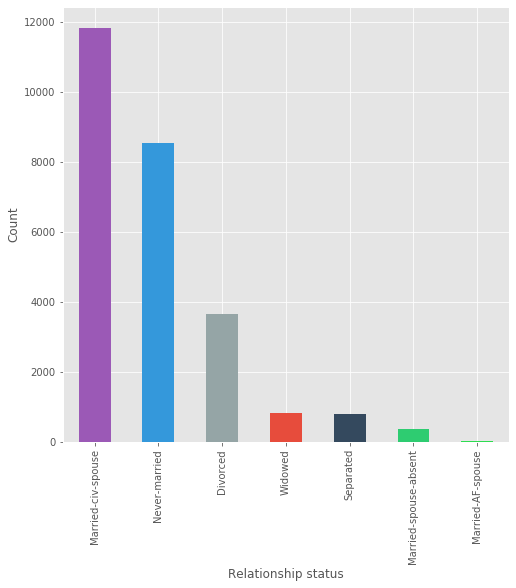

In [15]:
plt.figure(figsize = (8,8))
train.relationship_status.value_counts().plot(kind = 'bar',color=["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71","#2edc51"])
plt.xlabel("Relationship status")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

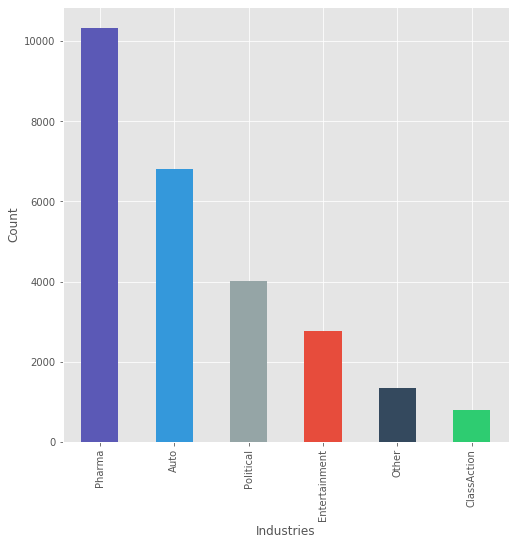

In [16]:
plt.figure(figsize=(8,8))
train.industry.value_counts().plot(kind = 'bar',color=["#5b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71","#2edc51"])
plt.xlabel("Industries")
plt.ylabel("Count")

Text(0.5, 0, 'Genre')

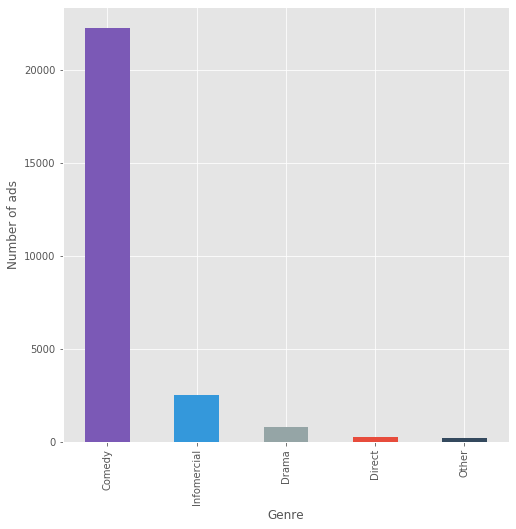

In [17]:
plt.figure(figsize = (8,8))
train.genre.value_counts().plot(kind = 'bar',color=["#7b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71","#2edc51"])
plt.ylabel("Number of ads")
plt.xlabel("Genre")

Text(0, 0.5, 'Count')

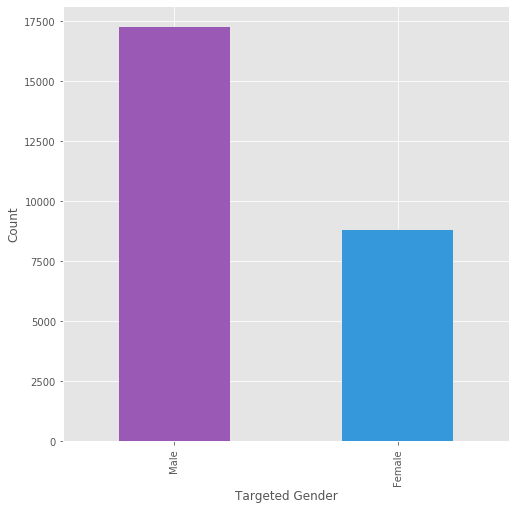

In [18]:
plt.figure(figsize = (8,8)) 
train.targeted_sex.value_counts().plot(kind = "bar",color=["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71","#2edc51"])
plt.xlabel("Targeted Gender")
plt.ylabel("Count")

Text(0.5, 0, 'Moneyback Guarantee')

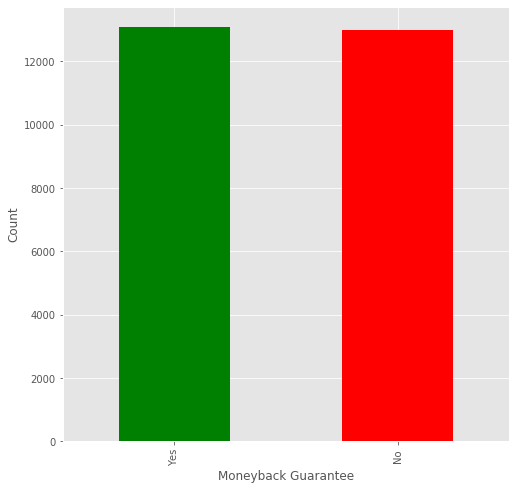

In [19]:
plt.figure(figsize=(8,8))
train.money_back_guarantee.value_counts().plot(kind = 'bar',color = ['green','red'])
plt.ylabel('Count')
plt.xlabel('Moneyback Guarantee')

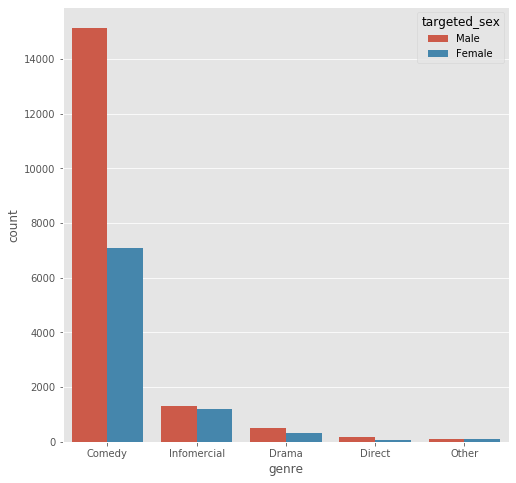

In [20]:
plt.figure(figsize=(8,8))
sns.countplot(x = 'genre',hue = 'targeted_sex',data = train)

Text(0.5, 0, 'Industries')

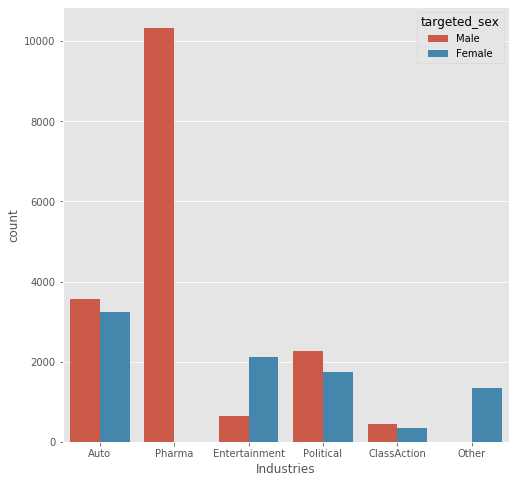

In [21]:
plt.figure(figsize=(8,8))
sns.countplot(x = 'industry',hue = 'targeted_sex',data = train,)
plt.xlabel("Industries")

Text(0.5, 0, 'Relationship Status')

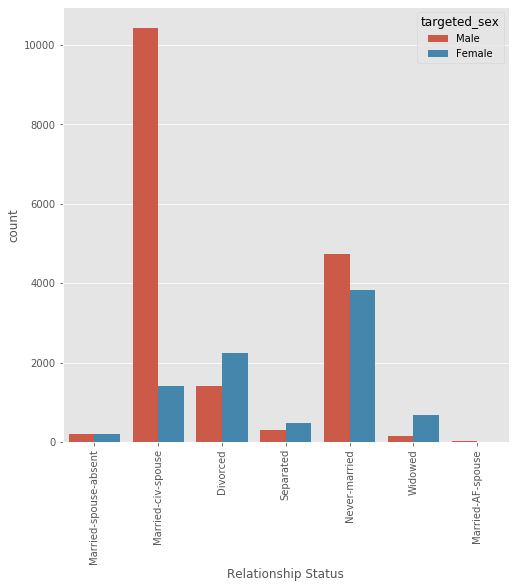

In [22]:
plt.figure(figsize=(8,8))
sns.countplot(x = 'relationship_status',hue = 'targeted_sex',data = train)
plt.xticks(rotation = 90)
plt.xlabel("Relationship Status")

Text(0.5, 0, 'Advertisment Genre, Industry')

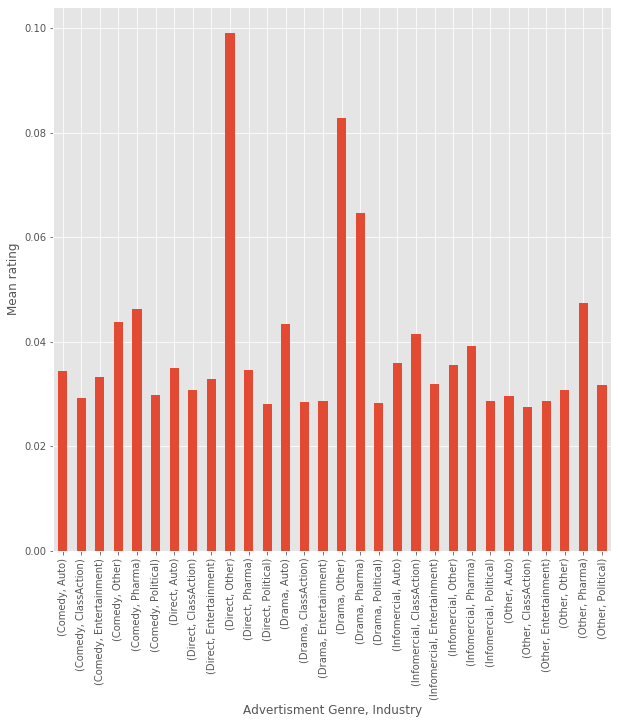

In [23]:
plt.figure(figsize=(10,10))
train.groupby(['genre','industry'])['ratings'].mean().plot(kind = 'bar')
plt.ylabel("Mean rating")
plt.xlabel("Advertisment Genre, Industry")

Text(0.5, 0, 'Advertisment Genre')

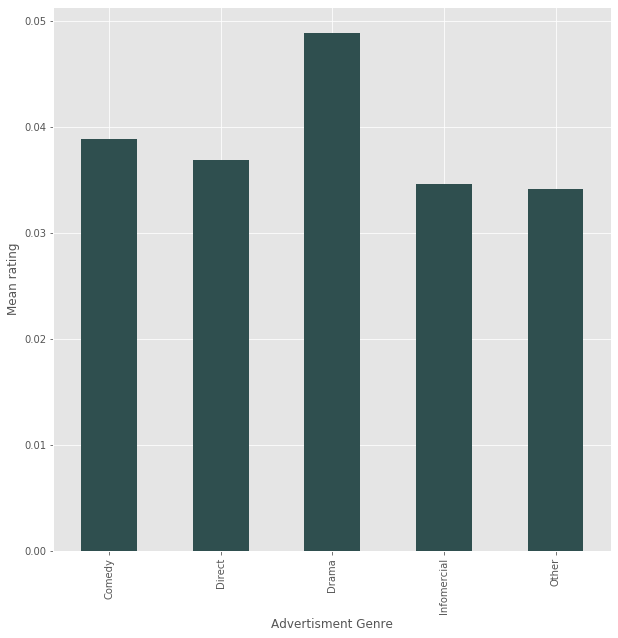

In [24]:
plt.figure(figsize=(10,10))
train.groupby('genre')['ratings'].mean().plot(kind = 'bar',color = "darkslategrey")
plt.ylabel("Mean rating")
plt.xlabel("Advertisment Genre")

Text(0.5, 0, 'Industry')

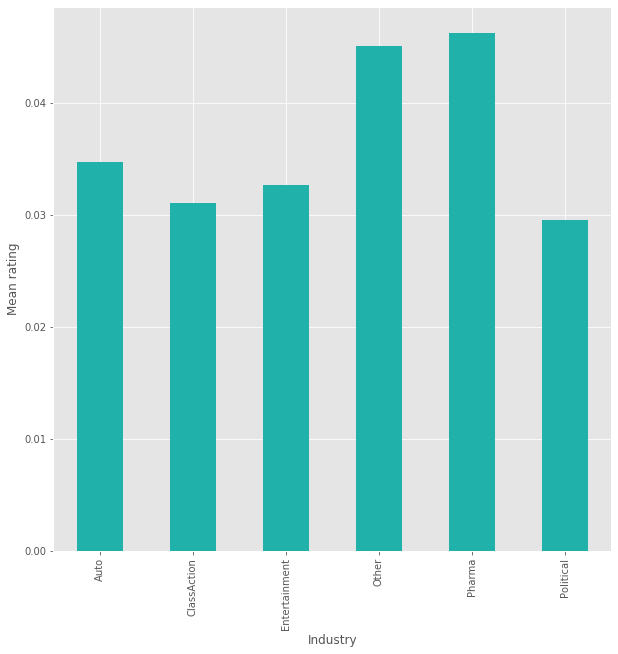

In [25]:
plt.figure(figsize=(10,10))
train.groupby('industry')['ratings'].mean().plot(kind = 'bar',color = "lightseagreen")
plt.ylabel("Mean rating")
plt.xlabel("Industry")

Text(0, 0.5, 'Mean rating')

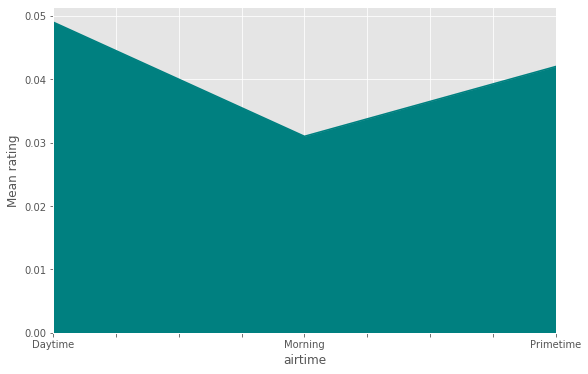

In [26]:
plt.figure(figsize=(9,6))
round(train.groupby('airtime')['ratings'].mean(),3).plot(kind = 'area',color = 'teal')
plt.ylabel("Mean rating")

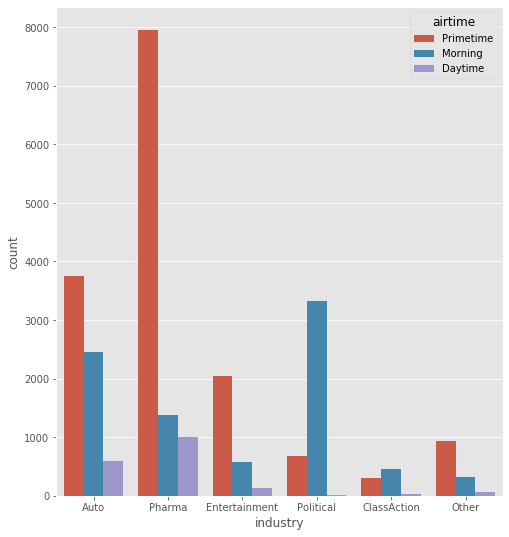

In [27]:
plt.figure(figsize=(8,9))
sns.countplot(x = 'industry',hue = 'airtime',data = train)

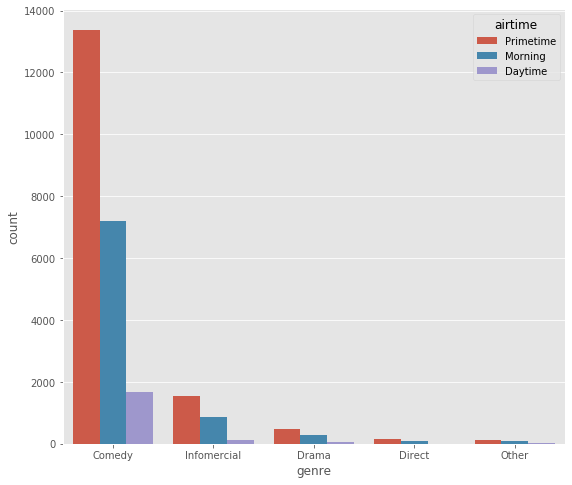

In [28]:
plt.figure(figsize=(9,8))
sns.countplot(x = 'genre',hue = 'airtime',data = train)

Text(0.5, 0, 'Advertisment Genre')

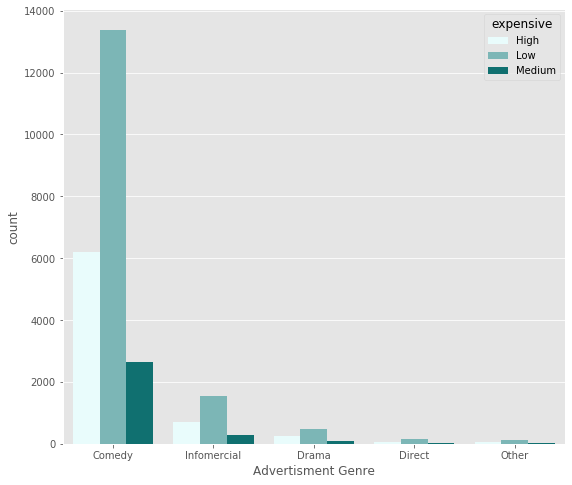

In [29]:
plt.figure(figsize=(9,8))
sns.countplot(x = 'genre',hue = 'expensive',data = train,color = 'teal')
plt.xlabel("Advertisment Genre")

40.29411087223587


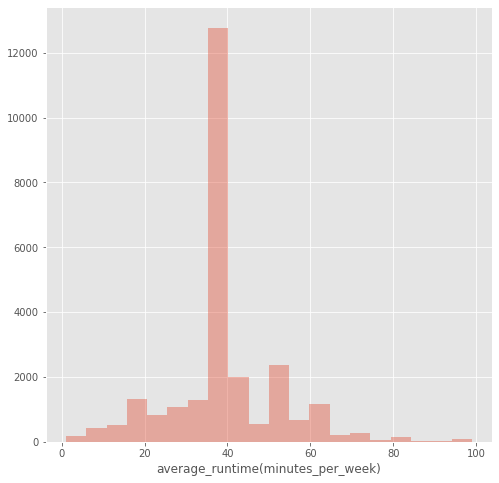

In [30]:
plt.figure(figsize=(8,8))
sns.distplot(train['average_runtime(minutes_per_week)'],kde = False , bins = 20)
print(train['average_runtime(minutes_per_week)'].mean())

In [31]:
merged_data = train.append(test)
testcount = len(test)
count = len(merged_data)-testcount
print(testcount)
print(count)

6513
26048


C:\Users\suraj\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [32]:
train_cat = train.select_dtypes(include=['object'])

In [33]:
col = train_cat.columns

In [34]:
train_cat = pd.get_dummies(train_cat,drop_first=True)

In [35]:
train_cat.head()

,relationship_status_Married-AF-spouse,relationship_status_Married-civ-spouse,relationship_status_Married-spouse-absent,relationship_status_Never-married,relationship_status_Separated,relationship_status_Widowed,industry_ClassAction,industry_Entertainment,industry_Other,industry_Pharma,...,airlocation_Taiwan,airlocation_Thailand,airlocation_Trinadad&Tobago,airlocation_United-States,airlocation_Vietnam,airlocation_Yugoslavia,expensive_Low,expensive_Medium,money_back_guarantee_Yes,netgain_True
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [36]:
train = pd.concat([train,train_cat],axis=1)

In [37]:
train.shape

(26048, 75)

In [38]:
train.drop(labels=col,axis=1,inplace=True)

In [39]:
train.head()

,id,average_runtime(minutes_per_week),ratings,relationship_status_Married-AF-spouse,relationship_status_Married-civ-spouse,relationship_status_Married-spouse-absent,relationship_status_Never-married,relationship_status_Separated,relationship_status_Widowed,industry_ClassAction,...,airlocation_Taiwan,airlocation_Thailand,airlocation_Trinadad&Tobago,airlocation_United-States,airlocation_Vietnam,airlocation_Yugoslavia,expensive_Low,expensive_Medium,money_back_guarantee_Yes,netgain_True
0,19717,45,0.027465,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,31593,45,0.027465,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,5681,45,0.027465,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,15491,40,0.027465,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
4,23587,48,0.027465,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [40]:
train.rename(columns=({"netgain_True":"netgain"}),inplace=True)

In [41]:
train.drop("id",axis=1,inplace=True)

In [42]:
test_cat = test.select_dtypes(include=['object'])

In [43]:
test_cat.head()

,relationship_status,industry,genre,targeted_sex,airtime,airlocation,expensive,money_back_guarantee
0,Widowed,Auto,Comedy,Female,Daytime,United-States,Low,No
1,Married-civ-spouse,Pharma,Comedy,Male,Morning,United-States,High,Yes
2,Divorced,Entertainment,Comedy,Female,Morning,United-States,Low,No
3,Married-civ-spouse,Pharma,Infomercial,Male,Primetime,United-States,Low,No
4,Married-civ-spouse,Pharma,Comedy,Male,Primetime,United-States,Low,Yes


In [44]:
test_cat = pd.get_dummies(test_cat,drop_first=True)

In [45]:
test_cat.head()

,relationship_status_Married-AF-spouse,relationship_status_Married-civ-spouse,relationship_status_Married-spouse-absent,relationship_status_Never-married,relationship_status_Separated,relationship_status_Widowed,industry_ClassAction,industry_Entertainment,industry_Other,industry_Pharma,...,airlocation_South,airlocation_Taiwan,airlocation_Thailand,airlocation_Trinadad&Tobago,airlocation_United-States,airlocation_Vietnam,airlocation_Yugoslavia,expensive_Low,expensive_Medium,money_back_guarantee_Yes
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,1


In [46]:
test.drop(labels=col[:-1],axis=1,inplace=True)

In [47]:
test = pd.concat([test,test_cat],axis=1)

In [48]:
test.head()

,id,average_runtime(minutes_per_week),ratings,relationship_status_Married-AF-spouse,relationship_status_Married-civ-spouse,relationship_status_Married-spouse-absent,relationship_status_Never-married,relationship_status_Separated,relationship_status_Widowed,industry_ClassAction,...,airlocation_South,airlocation_Taiwan,airlocation_Thailand,airlocation_Trinadad&Tobago,airlocation_United-States,airlocation_Vietnam,airlocation_Yugoslavia,expensive_Low,expensive_Medium,money_back_guarantee_Yes
0,1,10,0.027465,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
1,4,40,0.056262,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,5,50,0.027465,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,9,40,0.027465,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,10,40,0.027465,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1


In [49]:
id = test.id

In [50]:
missing_cols = set(train.columns ) - set(test.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    test[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
test = test[train.columns]

In [51]:
test.head()

,average_runtime(minutes_per_week),ratings,relationship_status_Married-AF-spouse,relationship_status_Married-civ-spouse,relationship_status_Married-spouse-absent,relationship_status_Never-married,relationship_status_Separated,relationship_status_Widowed,industry_ClassAction,industry_Entertainment,...,airlocation_Taiwan,airlocation_Thailand,airlocation_Trinadad&Tobago,airlocation_United-States,airlocation_Vietnam,airlocation_Yugoslavia,expensive_Low,expensive_Medium,money_back_guarantee_Yes,netgain
0,10,0.027465,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
1,40,0.056262,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,50,0.027465,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
3,40,0.027465,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,40,0.027465,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('netgain',axis = 1),train['netgain'],test_size=0.30,random_state = 7)

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
lr = LogisticRegression()

In [56]:
lr.fit(X_train,y_train)

C:\Users\suraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
lr_pred = lr.predict(X_test)

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
accuracy_score(lr_pred,y_test)

0.8028150991682661

In [60]:
test.drop("netgain",axis=1,inplace = True)

In [61]:
new_list = []
for elements in test.columns:
    if elements not in X_test.columns:
        new_list.append(elements)
new_list

[]

In [62]:
lr_pred = lr.predict(test)

In [63]:
id = pd.DataFrame(id)

In [64]:
predictions = []
for i in lr_pred:
    if i == 0:
        predictions.append('False')
    if i == 1:
        predictions.append('True')

In [65]:
predictions = pd.DataFrame(predictions,columns=['netgain'])

In [66]:
submission = pd.concat([id,predictions],axis=1)

In [67]:
submission = submission.reset_index()

In [68]:
submission.drop("index",axis=1,inplace=True)

In [69]:
submission.to_csv("LR_predictions.csv")

# Random forest classification

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rf = RandomForestClassifier()

In [72]:
rf.fit(X_train,y_train)

C:\Users\suraj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [73]:
test.shape[0]

6513

In [74]:
lr_pred.shape[0]

6513

In [75]:
from sklearn.svm import SVC

In [76]:
svc = SVC()

In [77]:
svc.fit(X_train,y_train)

C:\Users\suraj\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [78]:
predictions = svc.predict(test)

In [79]:
prediction = []
for i in predictions:
    if i == 0:
        prediction.append('False')
    if i == 1:
        prediction.append('True')

In [80]:
netgain = pd.DataFrame(prediction,columns=['netgain'])

In [81]:
submission1 = pd.concat([id,netgain],axis=1)

In [82]:
submission.to_csv("SVC_prediction.csv")

In [83]:
rf_predict = rf.predict(test)

In [84]:
prediction = []
for i in rf_predict:
    if i == 0:
        prediction.append('False')
    if i == 1:
        prediction.append('True')

In [85]:
prediction

['False',
 'True',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'True',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'True',
 'False',
 'True',
 'False',
 'False',
 'False',
 'True',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'True',
 'False',
 'False',
 'False',
 'False',
 'False',
 'True',
 'False',
 'False',
 'False',
 'False',
 'False',
 'True',
 'False',
 'False',
 'False',
 'True',
 'False',
 'False',
 'False',
 'True',
 'False',
 'False',
 'False',
 'True',
 'False',
 'False',
 'True',
 'False',
 'False',
 'False',
 'False',
 'True',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'True',
 'False',
 'False',
 'True',
 'False',
 'False',
 'False',
 'True',
 'False',
 'True',
 'False

In [86]:
netgain = pd.DataFrame(prediction,columns=['netgain'])

In [87]:
submission2 = pd.concat([id,netgain],axis=1)

In [88]:
submission2.to_csv("RandomForest.csv")

In [92]:
from xgboost import XGBClassifier

In [93]:
xgb = XGBClassifier()

In [94]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [95]:
xg_predict = xgb.predict(test)

In [96]:
prediction = []
for i in xg_predict:
    if i == 0:
        prediction.append('False')
    if i == 1:
        prediction.append('True')

In [97]:
netgain = pd.DataFrame(prediction,columns=['netgain'])

In [98]:
submission3 = pd.concat([id,netgain],axis=1)

In [99]:
submission3.to_csv("xgboost.csv")

In [100]:
from sklearn.model_selection import GridSearchCV

In [101]:
param_grid = {'max_depth': [2,4,6],
                     'n_estimators': [50,100,200]}

In [106]:
clf = GridSearchCV(estimator=xgb, 
                    param_grid=param_grid,
                    cv=5,refit=True,n_jobs=-1)

In [107]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6],
                         'n_estimators': [50, 100, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train

In [108]:
clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [109]:
xg = clf.best_estimator_

In [110]:
new_prediction = xg.predict(test)

In [112]:
prediction = []
for i in new_prediction:
    if i == 0:
        prediction.append('False')
    if i == 1:
        prediction.append('True')

In [113]:
netgain = pd.DataFrame(prediction,columns=['netgain'])

In [114]:
submission4 = pd.concat([id,netgain],axis=1)

In [115]:
submission4.to_csv("grid_xgboost.csv")